In [71]:
import numpy as np
import matplotlib.pylab as plt

def gaussian(x,xprom=0,sigma=1):
    y = np.exp(-(x-xprom)**2/(2*sigma**2))/np.sqrt(2*np.pi*sigma**3)
    return y

def rectangulo(x,w=2):
    y = np.where(np.abs(x)<=w,0.5,0)
    return y

def triangulo(x):
    y = -abs(x)+0.5
    return y*(y>0)

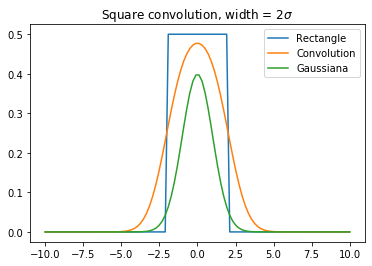

In [46]:
x = np.linspace(-10,10,100)
c = []
for t in x:
    a = -10
    b = 10
    h = (b-a)/(100)
    integral = 0
    for i in range(100):
        integral += h*gaussian(a)*rectangulo(t-a)
        a += h
    c.append(integral)

plt.plot(x,rectangulo(x),label='Rectangle')
plt.plot(x,c,label='Convolution')
plt.plot(x,gaussian(x,0,1),label='Gaussiana')
plt.legend()
plt.title('Square convolution, width = 2$\sigma$')
plt.show()

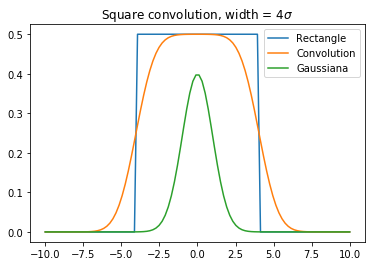

In [47]:
c1 = []
for t in x:
    a = -10
    b = 10
    h = (b-a)/(100)
    integral = 0
    for i in range(100):
        integral += h*gaussian(a)*rectangulo(t-a,4)
        a += h
    c1.append(integral)

plt.plot(x,rectangulo(x,4),label='Rectangle')
plt.plot(x,c1,label='Convolution')
plt.plot(x,gaussian(x,0,1),label='Gaussiana')
plt.legend()
plt.title('Square convolution, width = 4$\sigma$')
plt.show()

Entre más grande es el valor del ancho del rectangulo el dominio de la convolución también crece.

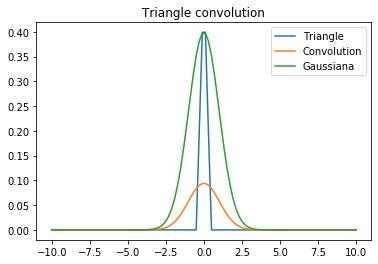

In [72]:
c2 = []
for t in x:
    a = -10
    b = 10
    h = (b-a)/(100)
    integral = 0
    for i in range(100):
        integral += h*gaussian(a)*triangulo(t-a)
        a += h
    c2.append(integral)

plt.plot(x,triangulo(x),label='Triangle')
plt.plot(x,c2,label='Convolution')
plt.plot(x,gaussian(x,0,1),label='Gaussiana')
plt.legend()
plt.title('Triangle convolution')
plt.show()

I( 1 ) = 1.465198914275243 , error = 6.722540072086739 %


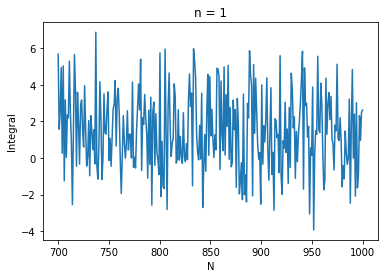

I( 2 ) = 1.5707974919458214 , error = 7.417581165540257e-05 %


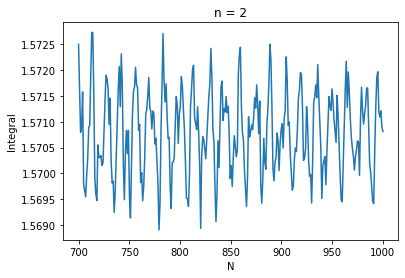

I( 3 ) = 1.1780972599102146 , error = 1.2574549577136649e-06 %


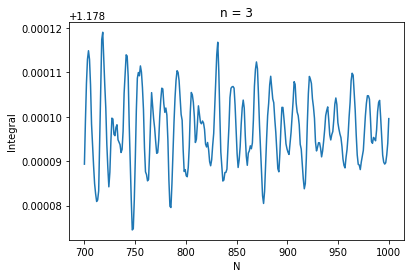

I( 4 ) = 1.0471975525258888 , error = 1.269379516885072e-07 %


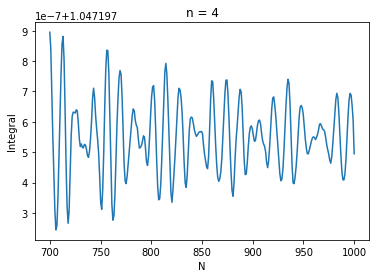

I( 5 ) = 0.9408415499232556 , error = 2.132376612039846e-09 %


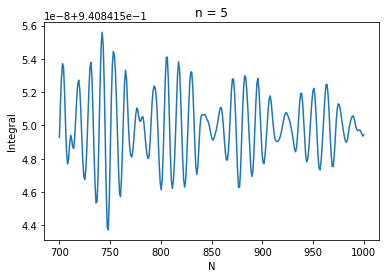

I( 6 ) = 0.8639379797378418 , error = 7.50739412085247e-11 %


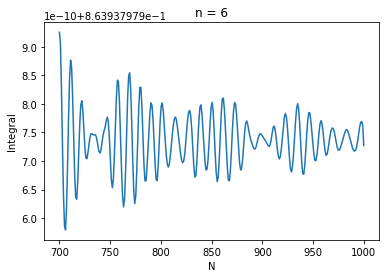

In [64]:
def sinc(x,n):
    y = (np.sin(x)/x)**n
    return y

def quadrature(f,N,n):
    integral = 0
    x0, w0 = np.polynomial.legendre.leggauss(N+1)
    x = (1+x0)/(1-x0)
    w = 2*w0/(1-x0)**2
    integral = sum(f(x,n)*w)
    return integral

n = [1,2,3,4,5,6]
N = np.linspace(700,1000,300,endpoint=True)
valores = np.array([1/2,1/2,3/8,1/3,115/384,11/40])*np.pi

for i in n:
    integral = []
    plt.figure()
    for j in N:
        integral.append(quadrature(sinc,int(j),i))
    error = 100*abs(np.array(integral).mean()-valores[n.index(i)])/valores[n.index(i)]
    print('I(',i,') =',np.array(integral).mean(),', error =',error,'%')
    plt.plot(N,integral)
    plt.title('n = '+str(i))
    plt.xlabel('N')
    plt.ylabel('Integral')
    plt.show()